## Exploratory Data Analysis

Dataset is taken from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This data used the following 23 variables as explanatory variables.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools
cc = pd.read_csv("default of credit card clients.csv",skiprows=1)
cc.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


ID column is dropped:

In [2]:
cc.drop('ID',axis=1,inplace=True)

Renaming column:

In [3]:
cc = cc.rename(columns={"default payment next month": "dpnm"})
cc.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


Variables info:

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


Descriptive Statistic:

In [5]:
cc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
cc['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

23364 person out of 30000 are cardholders without default payment.

In [7]:
cc['dpnm'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: dpnm, dtype: float64

22.12% person are cardholders with default payment.

## Multivariate Visualisation

Quantitative - Quantitative | Correlation matrix:

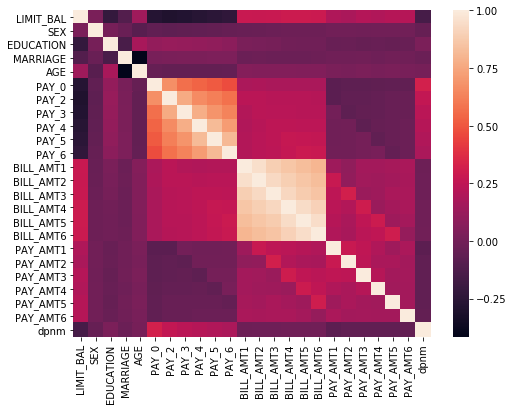

In [8]:
plt.figure(figsize=(8,6)) 
corr_matrix = cc.corr()
sns.heatmap(corr_matrix);

Quantitative - Categorical | Variables vs Default Payment boxplots:

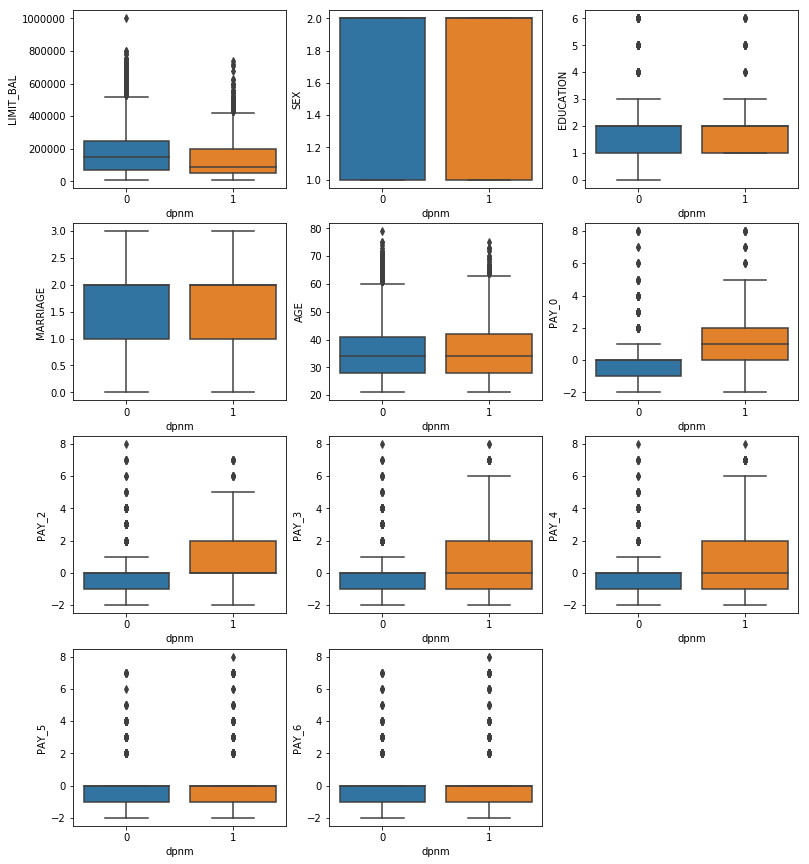

In [9]:
plt.figure(figsize=(13,15))
plt.subplot(4,3,1)
sns.boxplot(x='dpnm',y='LIMIT_BAL',data=cc)
plt.subplot(4,3,2)
sns.boxplot(x='dpnm',y='SEX',data=cc)
plt.subplot(4,3,3)
sns.boxplot(x='dpnm',y='EDUCATION',data=cc)
plt.subplot(4,3,4)
sns.boxplot(x='dpnm',y='MARRIAGE',data=cc)
plt.subplot(4,3,5)
sns.boxplot(x='dpnm',y='AGE',data=cc)
plt.subplot(4,3,6)
sns.boxplot(x='dpnm',y='PAY_0',data=cc)
plt.subplot(4,3,7)
sns.boxplot(x='dpnm',y='PAY_2',data=cc)
plt.subplot(4,3,8)
sns.boxplot(x='dpnm',y='PAY_3',data=cc)
plt.subplot(4,3,9)
sns.boxplot(x='dpnm',y='PAY_4',data=cc)
plt.subplot(4,3,10)
sns.boxplot(x='dpnm',y='PAY_5',data=cc)
plt.subplot(4,3,11)
sns.boxplot(x='dpnm',y='PAY_6',data=cc)



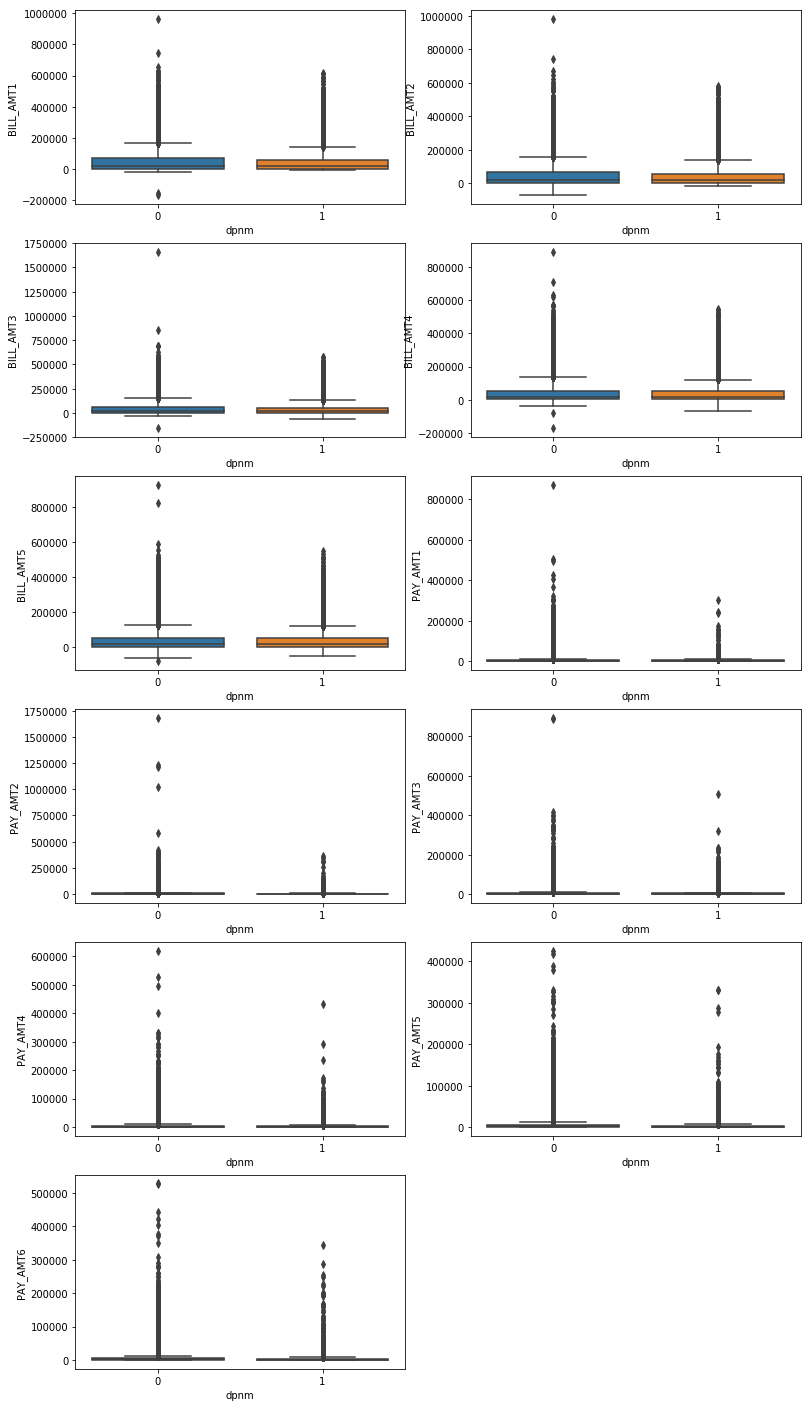

In [10]:
plt.figure(figsize=(13,25))
plt.subplot(6,2,1)
sns.boxplot(x='dpnm',y='BILL_AMT1',data=cc)
plt.subplot(6,2,2)
sns.boxplot(x='dpnm',y='BILL_AMT2',data=cc)
plt.subplot(6,2,3)
sns.boxplot(x='dpnm',y='BILL_AMT3',data=cc)
plt.subplot(6,2,4)
sns.boxplot(x='dpnm',y='BILL_AMT4',data=cc)
plt.subplot(6,2,5)
sns.boxplot(x='dpnm',y='BILL_AMT5',data=cc)
plt.subplot(6,2,6)
sns.boxplot(x='dpnm',y='PAY_AMT1',data=cc)
plt.subplot(6,2,7)
sns.boxplot(x='dpnm',y='PAY_AMT2',data=cc)
plt.subplot(6,2,8)
sns.boxplot(x='dpnm',y='PAY_AMT3',data=cc)
plt.subplot(6,2,9)
sns.boxplot(x='dpnm',y='PAY_AMT4',data=cc)
plt.subplot(6,2,10)
sns.boxplot(x='dpnm',y='PAY_AMT5',data=cc)
plt.subplot(6,2,11)
sns.boxplot(x='dpnm',y='PAY_AMT6',data=cc)


Categorical - Categorical | Education vs Default Payment

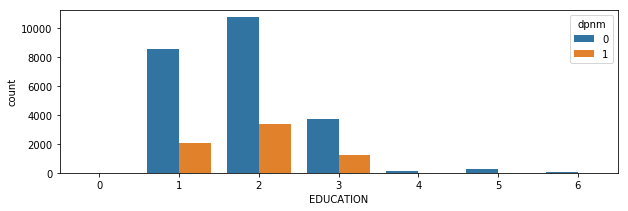

In [11]:
plt.figure(figsize=(10,3))
sns.countplot(x='EDUCATION', hue='dpnm', data=cc)

## Classification

In [12]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
import warnings
warnings.filterwarnings('ignore')

In [13]:
cc.shape

(30000, 24)

In [14]:
train_a,test_a=train_test_split(cc,test_size=0.3,random_state=0) 
train_b_a=train_a[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
                   'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
                   'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1',
                   'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
train_c_a=train_a.dpnm
test_b_a=test_a[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
                 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
                 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1',
                 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
test_c_a=test_a.dpnm


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_a)
X_train_std = sc.transform(train_a)
X_test_std = sc.transform(test_a)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=cc.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.063195  0.817793   0.187191  0.858058 -0.485236 -1.756704 -1.554090   
1   0.253364 -1.222803   0.187191 -1.059696 -0.485236  0.890707  1.756174   
2   2.576705  0.817793   2.719242  0.858058  0.276931 -1.756704 -1.554090   
3  -1.140640  0.817793   0.187191  0.858058 -1.465165  0.008236  0.101042   
4  -0.908306  0.817793   0.187191 -1.059696  1.365741  0.890707  1.756174   

      PAY_3     PAY_4     PAY_5    ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0 -1.526818 -1.523691 -1.532501    ...     -0.675090  -0.668727  -0.656920   
1  1.785922  0.180389  0.227164    ...     -0.233607  -0.190694  -0.175440   
2 -1.526818 -1.523691 -1.532501    ...     -0.038395  -0.514911  -0.510393   
3  0.129552  0.180389  0.227164    ...     -0.360786  -0.342881  -0.319751   
4  0.129552  0.180389  0.227164    ...     -0.371396  -0.355046

In [16]:
model=svm.SVC()
model.fit(train_b_a,train_c_a) 
prediction=model.predict(test_b_a) 
print('The accuracy of the SVM using all variables is:',metrics.accuracy_score(prediction,test_c_a))

The accuracy of the SVM using all variables is: 0.7848888888888889


In [17]:
model = LogisticRegression()
model.fit(train_b_a,train_c_a) 
prediction=model.predict(test_b_a) 
print('The accuracy of the Logistic Regression using all variables is:',metrics.accuracy_score(prediction,test_c_a))

The accuracy of the Logistic Regression using all variables is: 0.7844444444444445


In [18]:
model=DecisionTreeClassifier()
model.fit(train_b_a,train_c_a) 
prediction=model.predict(test_b_a) 
print('The accuracy of the Decision Tree using all variables is:',metrics.accuracy_score(prediction,test_c_a))

The accuracy of the Decision Tree using all variables is: 0.7342222222222222


In [19]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_b_a,train_c_a) 
prediction=model.predict(test_b_a) 
print('The accuracy of the KNN using all variables is:',metrics.accuracy_score(prediction,test_c_a))

The accuracy of the KNN using all variables is: 0.739


In [20]:
model=svm.LinearSVC()
model.fit(train_b_a,train_c_a) 
prediction=model.predict(test_b_a) 
print('The accuracy of the Linear SVC using all variables is:',metrics.accuracy_score(prediction,test_c_a))

The accuracy of the Linear SVC using all variables is: 0.32655555555555554


SVM.SVC is giving the best accuracy with 78.48% score.

In [21]:
ccz=cc[['EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','dpnm']]

In [22]:
train_d,test_d=train_test_split(ccz,test_size=0.3,random_state=0) 
train_e_d=train_d[['EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
train_f_d=train_d.dpnm
test_e_d=test_d[['EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
test_f_d=test_d.dpnm

In [23]:
model=svm.SVC()
model.fit(train_e_d,train_f_d) 
prediction=model.predict(test_e_d) 
print('The accuracy of the SVM using Education, Age, and Payment History is:',metrics.accuracy_score(prediction,test_f_d))

The accuracy of the SVM using Education, Age, and Payment History is: 0.8203333333333334


Observations:

   1. Using all data for training the data gives a much better accuracy when classified with SVM.SVC.
   2. Using Education, Age, and Payment History as chosen features for training the data gives a much better accuracy when classified with SVM.SVC.
   2. This was expected as we saw in the heatmap above that the correlation between Education, Age, and Payment History to Default Payment was higher than the others.



## Dimensionality Reduction

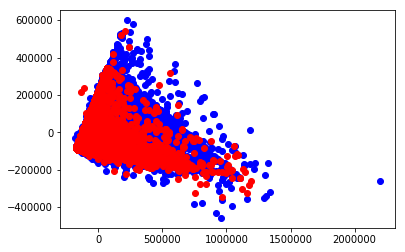

In [24]:
from sklearn.decomposition import PCA
from pylab import plot,show
from numpy import genfromtxt, zeros
target = genfromtxt('default of credit card clients.csv',delimiter=',',usecols=(24),skip_header=2,dtype=int)
pca = PCA(n_components=2)
pcad = pca.fit_transform(cc[cc.columns[:23]])
plot(pcad[target==0,0],pcad[target==0,1],'bo')
plot(pcad[target==1,0],pcad[target==1,1],'ro')
show()

In [25]:
print(pca.explained_variance_ratio_)

[0.61043701 0.29535381]


The first principal component accounts for 61% of the information of the original dataset and the secon one accounts for the remaining 29%.

In [26]:
cc.shape

(30000, 24)

In [27]:
print (1-sum(pca.explained_variance_ratio_))

0.09420917415705488


The percentage of information we lost is 9%.

In [28]:
for i in range(1,24):
    pca = PCA(n_components=i)
    pca.fit(cc)
    print (sum(pca.explained_variance_ratio_) * 100,'%')

61.04370130752248 %
90.57908258396043 %
93.63150183258672 %
95.32436109196878 %
96.26640301792403 %
97.17057756242585 %
97.92502335277258 %
98.5635047319761 %
99.1472135027531 %
99.44388491430063 %
99.68239091675927 %
99.85216527023782 %
99.99999979997565 %
99.99999998313865 %
99.99999999253919 %
99.9999999944921 %
99.99999999574094 %
99.99999999692207 %
99.99999999770635 %
99.99999999828394 %
99.99999999882122 %
99.99999999928684 %
99.9999999996727 %


From the output of the snippet above we can see that on the Default of Credit Card Clients dataset we can save almost 100% of the information just by using nine PCs.